# Advertisement : A Deep Dive 
  ### Author : Aniket Routh
    
   *New Delhi, India*
   
   *16th May, 2022*

**This data set contains the following features:**

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [184]:
adver = pd.read_csv('advertising.csv')

**--------------------------------------------------------------------------------------------**

#                               PART 1 : Exploratory Data Analysis

In [185]:
adver.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**--------------------------------------------------------------------------------------------**

In [186]:
adver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


**The collection contains ten unique traits and 1000 samples from 237 countries.**

**---------------------------------------------------------------------------------------------------------------------**

**Checking for missing values**

In [187]:
adver.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

**No missing values were found.**

**---------------------------------------------------------------------------------------------------------------------**

**Countries having the highest and lowest levels of representationn**

In [188]:
adver['Country'].value_counts().head()

France            9
Czech Republic    9
Peru              8
Turkey            8
Greece            8
Name: Country, dtype: int64

**The countries with the most cities represented in the sample are listed above.**

**--------------------------------------------------------------------------------------------**

In [189]:
adver['Country'].value_counts().tail(14)

Marshall Islands                                       1
Bermuda                                                1
Jordan                                                 1
Mozambique                                             1
Kiribati                                               1
Saint Kitts and Nevis                                  1
Slovenia                                               1
Cape Verde                                             1
Montserrat                                             1
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, dtype: int64

**The countries with the fewest cities in the sample are listed above.**

**--------------------------------------------------------------------------------------------**

In [190]:
adver.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<AxesSubplot:xlabel='Gender', ylabel='count'>

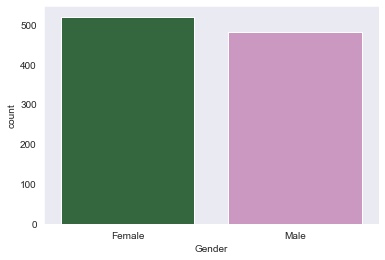

In [256]:
sns.countplot(x='Gender',data = adver,palette = 'cubehelix')

**The average age of the tested population is 36 years old. Individuals in the sample spent an average of 65 minutes on a single website and were online for an average of 180 minutes every day. Males account for 48.1 percent of the sample, while females account for 51.9 percent.**

**--------------------------------------------------------------------------------------------**

In [264]:
Age = adver.groupby('Age').sum()

In [265]:
Age.head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Hour,Female
Age,,,,,,,,
19,365.80,283778.89,1126.92,4,1,28,64,2
20,400.25,304227.64,1169.99,5,1,30,89,1
21,410.76,304587.43,1249.41,4,0,13,75,2
22,923.13,693719.29,2575.55,4,1,48,145,9
23,1298.33,947186.86,3496.70,10,8,70,179,9


<AxesSubplot:xlabel='Age', ylabel='Clicked on Ad'>

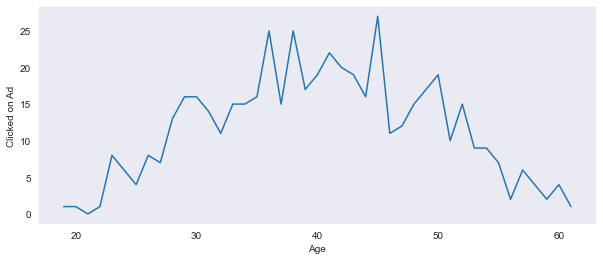

In [266]:
sns.set_style("dark")
plt.figure(figsize = (10,4))
sns.lineplot(x = Age.index,y = 'Clicked on Ad',data  = Age)

### ---------------------------------------------------------------------------------------------

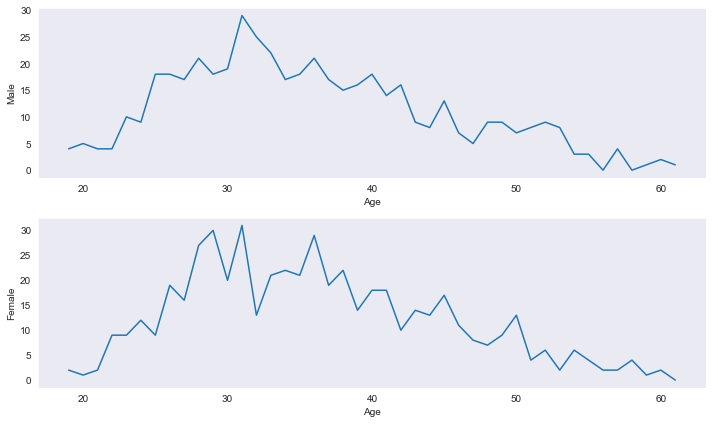

In [268]:
fig, axes = plt.subplots(2, 1,figsize = (10,6))
sns.lineplot(x = Age.index,y = 'Male',data = Age,ax=axes[0])
sns.lineplot(x = Age.index,y = 'Female',data = Age,ax = axes[1])
plt.tight_layout()

### ---------------------------------------------------------------------------------------------

<Figure size 6000x4000 with 0 Axes>

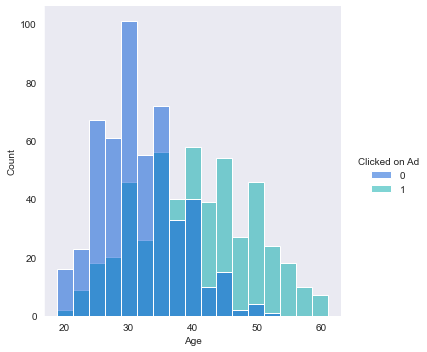

In [210]:
sns.set_style("dark")
plt.figure(dpi = 1000)
sns.displot(x='Age',data = adver,hue = 'Clicked on Ad',palette = 'winter')

**People under the age of 35 showed little or no interaction, however those aged 45 and over were more engaged.**

**--------------------------------------------------------------------------------------------**

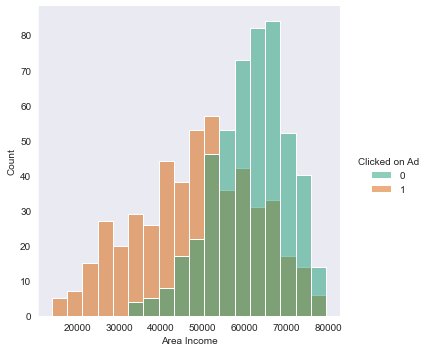

In [217]:
sns.displot(x = 'Area Income',data = adver,hue = 'Clicked on Ad',palette = 'Dark2')

**In comparison to the higher income groups, more people in the lower income groups clicked on Ads.**

**--------------------------------------------------------------------------------------------**

<Figure size 6000x4000 with 0 Axes>

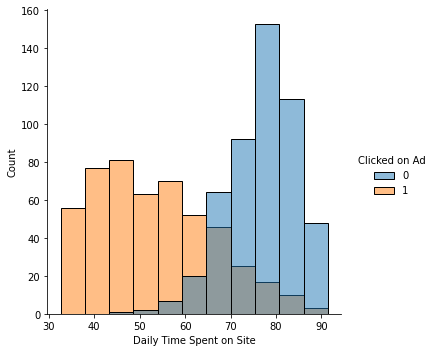

In [381]:
plt.figure(dpi = 1000)
sns.displot(x = 'Daily Time Spent on Site',data = adver,hue = 'Clicked on Ad')

**People who spend more time on a specific website are less likely to click on advertisements.**

**--------------------------------------------------------------------------------------------**

In [218]:
adver['Female'] = adver['Male'].apply(lambda x : 1-x)

In [219]:
country = adver[['Daily Time Spent on Site','Age','Daily Internet Usage','Male','Female','Country']].groupby('Country').sum()

In [220]:
country['Total Users'] = country['Male']+country['Female']

In [221]:
country['Total Users'].sort_values(ascending=False).head(20)

Country
France                    9
Czech Republic            9
Afghanistan               8
Australia                 8
Turkey                    8
South Africa              8
Senegal                   8
Peru                      8
Micronesia                8
Greece                    8
Cyprus                    8
Liberia                   8
Albania                   7
Bosnia and Herzegovina    7
Taiwan                    7
Bahamas                   7
Burundi                   7
Cambodia                  7
Venezuela                 7
Fiji                      7
Name: Total Users, dtype: int64

**The countries listed above have the most internet users, which corresponds to the prior result about the most represented countries.**

**--------------------------------------------------------------------------------------------**

In [224]:
country['Daily Time Spent on Site'].sort_values(ascending = False).head(5)

Country
Greece            576.63
France            570.88
Czech Republic    553.81
Senegal           523.19
Afghanistan       518.26
Name: Daily Time Spent on Site, dtype: float64

**These are the top five countries with the most internet users**

**--------------------------------------------------------------------------------------------**

**--------------------------------------------------------------------------------------------**

In [225]:
country['Daily time spent '] = country['Daily Internet Usage']/country['Total Users']

In [226]:
country['Daily time spent '].sort_values(ascending = False)

Country
Mozambique                                             248.230000
Malaysia                                               242.306667
Uzbekistan                                             241.750000
Bermuda                                                239.940000
India                                                  235.705000
                                                          ...    
Montenegro                                             124.535000
Saint Barthelemy                                       121.580000
Romania                                                121.070000
British Indian Ocean Territory (Chagos Archipelago)    118.390000
Montserrat                                             115.910000
Name: Daily time spent , Length: 237, dtype: float64

In [227]:
country.loc['Mozambique',:]

Daily Time Spent on Site     78.41
Age                          33.00
Daily Internet Usage        248.23
Male                          1.00
Female                        0.00
Total Users                   1.00
Daily time spent            248.23
Name: Mozambique, dtype: float64

*The most active user among the 1000 participants was a 33-year-old Mozambican man.*

**--------------------------------------------------------------------------------------------**

In [228]:
country['Ad Website'] = adver['Daily Time Spent on Site']

In [229]:
country = country.iloc[:,:-1]

In [230]:
ads = adver.groupby(by='Country').sum()

**--------------------------------------------------------------------------------------------**

**--------------------------------------------------------------------------------------------**

**The countries that were most interested in the advertisements were**

In [231]:
ads['Clicked on Ad'].sort_values(ascending = False).head(10)

Country
Australia        7
Turkey           7
Ethiopia         7
Liberia          6
South Africa     6
Liechtenstein    6
Senegal          5
Peru             5
Mayotte          5
Hungary          5
Name: Clicked on Ad, dtype: int64

**--------------------------------------------------------------------------------------------**

**Countries that did not respond to the advertisements**

In [232]:
ads['Clicked on Ad'].sort_values(ascending = False).tail(22)

Country
Bolivia                       0
Bermuda                       0
Croatia                       0
Cape Verde                    0
Cameroon                      0
Swaziland                     0
Gabon                         0
Gibraltar                     0
India                         0
Sudan                         0
Sri Lanka                     0
Jordan                        0
Slovakia (Slovak Republic)    0
Lesotho                       0
Malaysia                      0
Mozambique                    0
Nepal                         0
Nicaragua                     0
Niue                          0
Reunion                       0
Panama                        0
Aruba                         0
Name: Clicked on Ad, dtype: int64

**--------------------------------------------------------------------------------------------**

**Countries having highest mean income.**

In [233]:
ads['Area Income'].sort_values(ascending = False).head(5)

Country
France            508289.26
Czech Republic    502481.83
South Africa      462093.76
Micronesia        449004.74
Venezuela         447198.79
Name: Area Income, dtype: float64

**--------------------------------------------------------------------------------------------**

In [234]:
adver['Timestamp'] = pd.to_datetime(adver['Timestamp'])

In [235]:
adver['Month'] = adver['Timestamp'].apply(lambda x : x.month)

In [236]:
month = adver.groupby(by = 'Month').sum()

In [237]:
month.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Female
Month,,,,,,,
3,10050.89,5626,8563723.22,27696.97,88,74,68
4,9651.85,5447,8082911.97,26577.32,69,74,78
5,9414.66,5189,8141431.01,26295.04,67,79,80
6,9105.29,5111,7659559.53,25353.02,72,71,70
7,6667.35,3718,5425980.76,18893.77,46,50,55


In [258]:
adver['Hour'] = adver['Timestamp'].apply(lambda x : x.hour)

In [259]:
adver['Day'] = adver['Timestamp'].apply(lambda x : x.day_of_week)

In [260]:
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
adver['Day'] = adver['Day'].map(days)

In [261]:
def gen(x):
    if x == 0:
        return "Female"
    return "Male"
adver['Gender'] = adver['Male'].apply(lambda x : gen(x))
adver.drop('Female',axis = 1,inplace = True)

In [262]:
adver['Female'] = adver['Male'].apply(lambda x: 1-x)

**--------------------------------------------------------------------------------------------**

*Chart Showing the number of Advertisements clicked throughout the months*

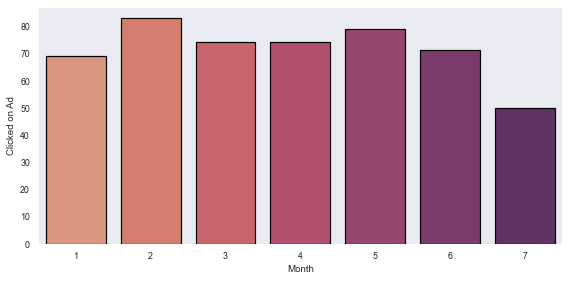

In [285]:
sns.set_context("paper")
plt.figure(figsize = (8,4))
sns.barplot(x = month.index,y = 
            'Clicked on Ad',
           data = month,palette = 'flare', edgecolor=(0,0,0),
                  linewidth=1.2)
plt.tight_layout()

**--------------------------------------------------------------------------------------------**

*Chart showing the number of Ads clicked on different days of a week*

In [280]:
day = adver.groupby('Day').sum()

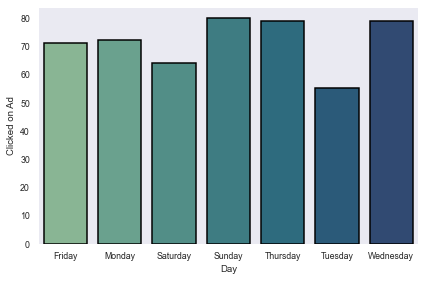

In [282]:
sns.barplot(x = day.index,y='Clicked on Ad',data = day,edgecolor=(0,0,0),
                  linewidth=1.5,palette = 'crest')
plt.tight_layout()

**--------------------------------------------------------------------------------------------**

**Barchart for the Number of Ads clicked throughout the day**

In [293]:
hour = adver.groupby('Hour').sum()

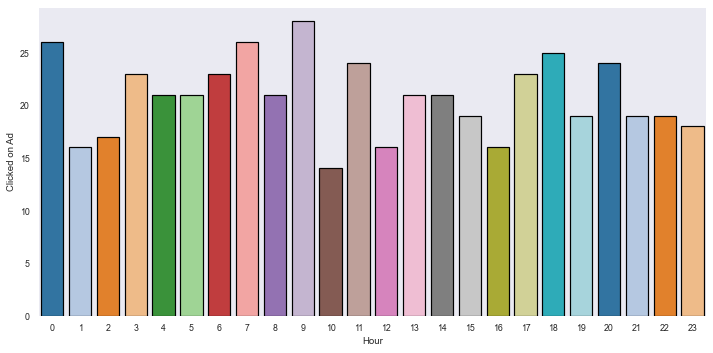

In [305]:
plt.figure(figsize = (10,5))
sns.barplot(x = hour.index,y = 'Clicked on Ad',data = hour,edgecolor=(0,0,0),
                  linewidth=1.2,palette = 'tab20')
plt.tight_layout()

**--------------------------------------------------------------------------------------------**

**Barchart for the Number of active Male users in 24 Hours**

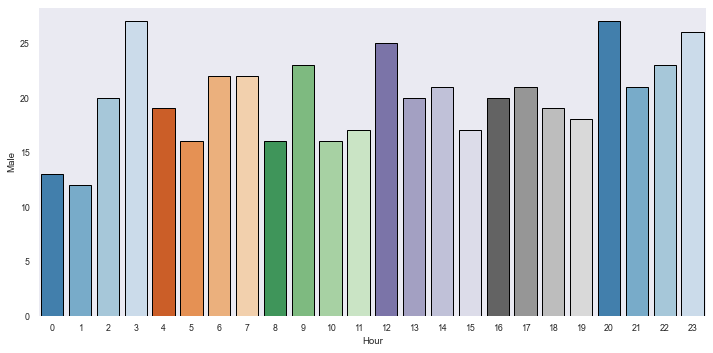

In [308]:
plt.figure(figsize = (10,5))
sns.barplot(x = hour.index,y='Male',data = hour,edgecolor=(0,0,0),
                  linewidth=1,palette = 'tab20c')
plt.tight_layout()

**--------------------------------------------------------------------------------------------**

**Barchart for the Number of active Female users in 24 Hours**

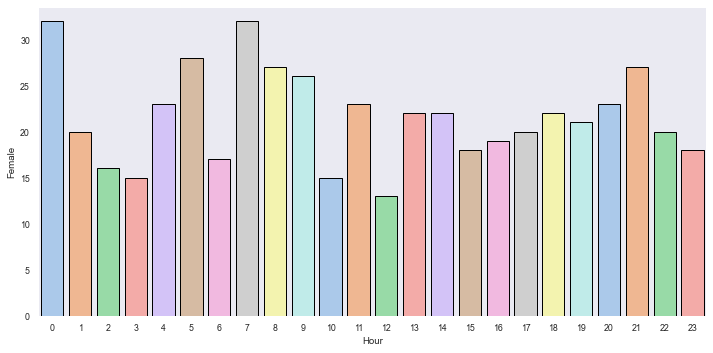

In [309]:
plt.figure(figsize = (10,5))
sns.barplot(x = hour.index,y='Female',data = hour,edgecolor=(0,0,0),
                  linewidth=1,palette = 'pastel')
plt.tight_layout()

**--------------------------------------------------------------------------------------------**

## Countries with most number of Ad Clicks in groups of Male Female and peak hours.

In [310]:
adver[(adver['Hour'] == 3) ].groupby('Country').sum()['Male'].sort_values(ascending = False).head(
10)

Country
United Arab Emirates    2
Uganda                  2
Afghanistan             1
France                  1
Tuvalu                  1
Tanzania                1
Spain                   1
Sierra Leone            1
Marshall Islands        1
Macedonia               1
Name: Male, dtype: int64

In [311]:
adver[(adver['Hour'] == 20) ].groupby('Country').sum()['Male'].sort_values(ascending = False).head(
10)

Country
Saint Vincent and the Grenadines    2
Western Sahara                      1
Jersey                              1
Philippines                         1
Peru                                1
Palestinian Territory               1
South Africa                        1
Sri Lanka                           1
Bahamas                             1
Myanmar                             1
Name: Male, dtype: int64

In [312]:
adver[(adver['Hour'] == 0) ].groupby('Country').sum()['Female'].sort_values(ascending = False).head(
10)

Country
Eritrea           2
Poland            2
France            2
Saint Helena      1
Myanmar           1
Niue              1
Panama            1
Rwanda            1
American Samoa    1
Mayotte           1
Name: Female, dtype: int64

In [313]:
adver[(adver['Hour'] == 7) ].groupby('Country').sum()['Male'].sort_values(ascending = False).head(
10)

Country
Italy                     1
El Salvador               1
Madagascar                1
Libyan Arab Jamahiriya    1
Philippines               1
Kazakhstan                1
Jersey                    1
Portugal                  1
Ireland                   1
Honduras                  1
Name: Male, dtype: int64

**--------------------------------------------------------------------------------------------**

**Jointplot to Demostrate the Distribution of Income against Age**

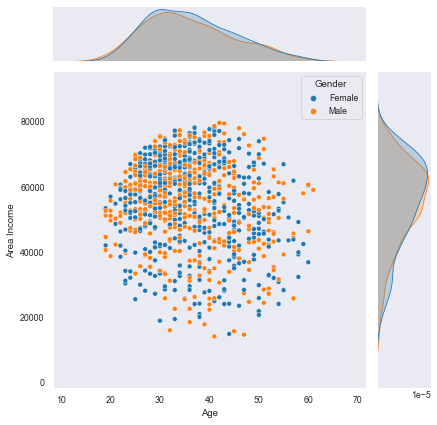

In [314]:
sns.jointplot(x = 'Age',y = 'Area Income',data = adver,hue = 'Gender')

**--------------------------------------------------------------------------------------------**

**Jointplot of Daily Time spent on site vs. Age.**

**--------------------------------------------------------------------------------------------**

**Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage' based on Male and Female**

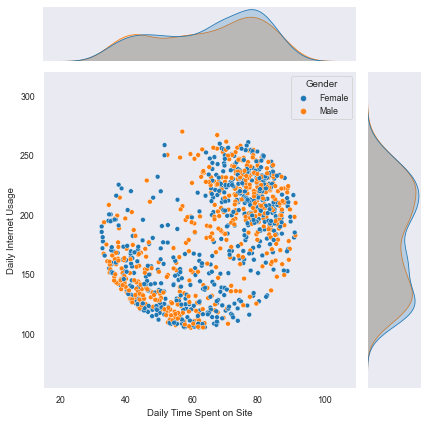

In [315]:
sns.jointplot(x ='Daily Time Spent on Site',y =  'Daily Internet Usage',data = adver,hue = 'Gender')

**--------------------------------------------------------------------------------------------**

**Pairplot for different numerical attributes**

In [316]:
adver.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Month', 'Hour', 'Day', 'Gender',
       'Female'],
      dtype='object')

In [317]:
pair = adver[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad', 'Gender']]

<Figure size 60000x40000 with 0 Axes>

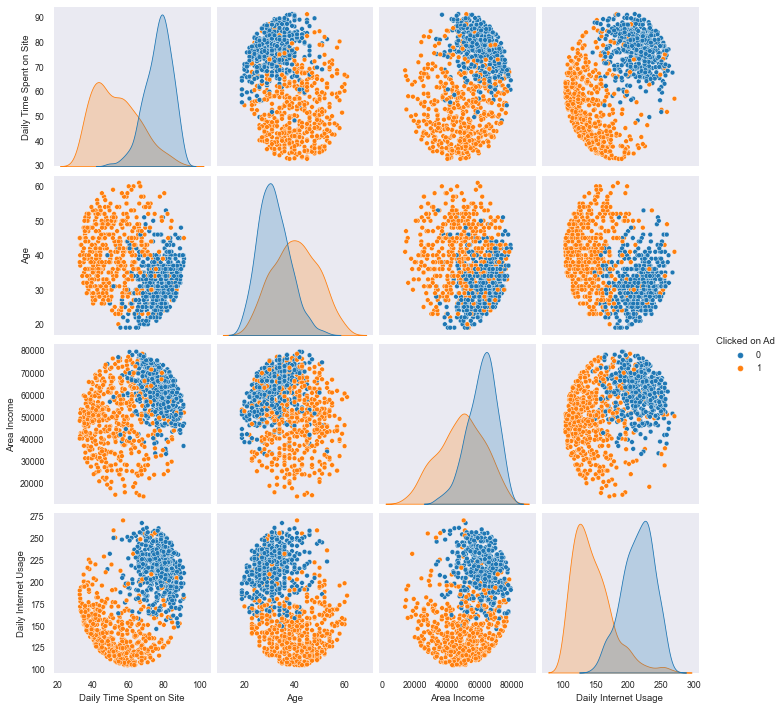

In [318]:
plt.figure(dpi = 10000)
sns.pairplot(pair,hue = 'Clicked on Ad')

# Important Takeaways
* People in the older age groups tend to click on more Advertisements.People between ages 40 to 50 clicked the most.
* People living in areas with an average income of $45,000 to $55,000 clicked on most of the advertisements.
* France and the Czech Republic have the most online users.
* Greece has the longest period of time online.
* The most advertisements were clicked on by Australia, Turkey, and Ethiopia, followed by Liberia, South     Africa, and Lichtenstein.
* Zero engagements were registered in Bolivia,Bermuda,Croatia,Cape      Verde,Cameroon,Swaziland,Gabon,Gibraltar,India,Sudan,Sri Lanka,Jordan,Slovakia(Slovak Republic),Lesotho,Malaysia,Mozambique,Nepal,Nicaragua,Niue,Reunion,Panama
* The month with the most Ad. clicks was February, followed by May.
* On Sundays and Wednesdays, the most ads were clicked, followed by Thursdays.
* 12 A.M. to 1 A.M. and 9 A.M. to 10 A.M. saw the most nummber Advertisements being clicked.
* Male users were most active in the following time intervals 2 A.M. to 3 A.M. and 8 P.M. to 9 P.M. on a dailt basis.
* Female users were most active in the following time intervals 12 A.M. to 1 A.M. and 7 A.M to  8 A.M. on a daily basis.
* The male-dominated countries that clicked on the most ads were the United Arab Emirates, Uganda, and Saint Vincent and the Grenadines.
* The female-dominated countries that clicked on the most ads were Eritrea, Poland, and France.

# ----------------------------------------------------------------

#                                          PART 2 : Model Building

In [319]:
X=pd.read_csv('advertising.csv')

## Splitting the covariates and the dependent variabe into training and testing data.

In [320]:
X = X.loc[:,['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']].values

In [321]:
y = adver.loc[:,'Clicked on Ad'].values

In [322]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

## Fitting a Decision Tree 

In [323]:
from sklearn.tree import DecisionTreeClassifier
Tree  = DecisionTreeClassifier()
Tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [324]:
Yp = Tree.predict(x_test)

In [325]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Yp)
print(cm)
accuracy_score(y_test, Yp)

[[129   6]
 [ 11 154]]


0.9433333333333334

## Descission Tree Diagram

In [333]:
from sklearn.tree import plot_tree

[Text(0.41875, 0.9615384615384616, 'X[3] <= 177.265\ngini = 0.499\nsamples = 700\nvalue = [365, 335]'),
 Text(0.2, 0.8846153846153846, 'X[0] <= 71.315\ngini = 0.148\nsamples = 323\nvalue = [26, 297]'),
 Text(0.14285714285714285, 0.8076923076923077, 'X[2] <= 76615.586\ngini = 0.029\nsamples = 274\nvalue = [4, 270]'),
 Text(0.11428571428571428, 0.7307692307692307, 'X[3] <= 175.825\ngini = 0.015\nsamples = 272\nvalue = [2, 270]'),
 Text(0.05714285714285714, 0.6538461538461539, 'X[2] <= 72203.141\ngini = 0.007\nsamples = 268\nvalue = [1, 267]'),
 Text(0.02857142857142857, 0.5769230769230769, 'gini = 0.0\nsamples = 258\nvalue = [0, 258]'),
 Text(0.08571428571428572, 0.5769230769230769, 'X[1] <= 30.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.05714285714285714, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11428571428571428, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.17142857142857143, 0.6538461538461539, 'X[3] <= 176.4\ngini = 0.375\nsamples = 4\nvalue = 

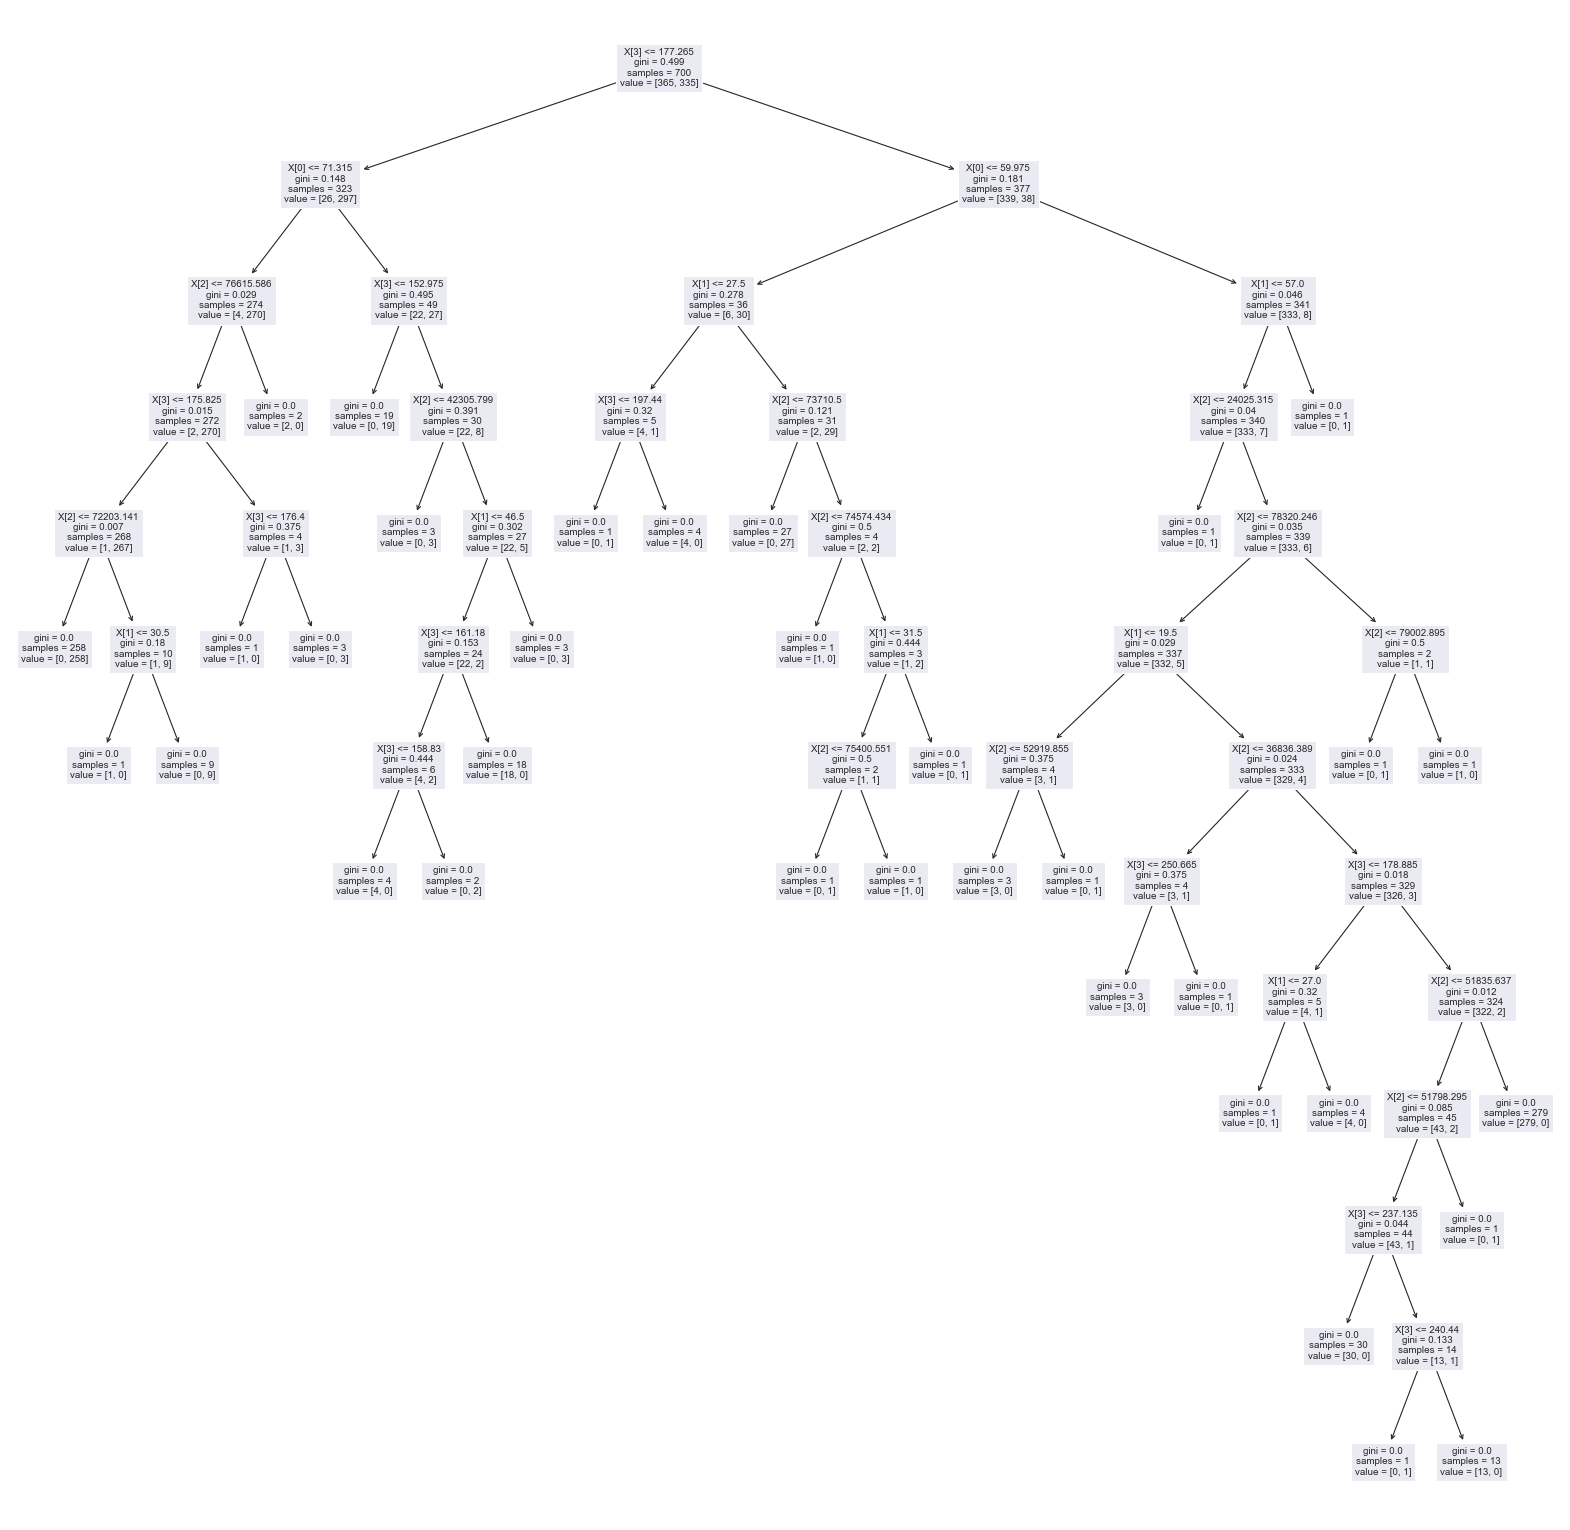

In [338]:
plt.figure(figsize=(20, 20), dpi= 100)
plot_tree(Tree)

In [339]:
from sklearn.model_selection import cross_val_score

In [340]:
kfold = cross_val_score(Tree,X_train,y_train)

In [341]:
print(kfold.mean())

0.9514285714285714


### Decision Tree had an accuracy of 95.14 % 

### -------------------------------------------------------------------------------------------

# Using Random Forest Classifier.

In [342]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [343]:
y_pred = classifier.predict(x_test)

In [344]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[131   4]
 [  8 157]]


0.96

In [348]:
from sklearn.model_selection import cross_val_score

In [349]:
kfold = cross_val_score(classifier,X_train,y_train)

In [350]:
print(kfold.mean())

0.9642857142857142


### Random Forest Classifier had an accuracy of 96.42 % 

### ---------------------------------------------------------------------------------------------

# Inference

### An organisation, advertising agency, or any product-based company seeking the most efficacy from their advertisement campaign should target individuals aged 35 and above living in areas with average incomes ranging from $45000 to $65000; additionally, the advertisement campaign can be run in countries such as Australia, Turkey, and Ethiopia, Liberia, South Africa, and Lichtenstein with greater emphasis as these countries clicked on the most number of  Advertisements.

### The Random Forest Classifier can classify and estimate the amount of probable positive responses for organisations that want to analyse the efficacy of their future adverts using data from the past.

**-------------------------------------------------- END OF REPORT --------------------------------------------------**